# Analysis of COVID-19 Data from The New York Times

*Author: Mark Bauer*  
*Date: March 28, 2020*

The New York Times Github Data [Repository](https://github.com/nytimes/covid-19-data).   
The New York Time [News Article](https://www.nytimes.com/article/coronavirus-county-data-us.html).  
The New York Times COVID-19 US Map: https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html.   
The New York Times COVID-19 Global Map: https://www.nytimes.com/interactive/2020/world/coronavirus-maps.html.

In [1]:
# importing libraries
import pandas as pd # the pd is by convention
import numpy as np # as is the np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter
import matplotlib.dates as dates
import seaborn as sns
import geopandas as gpd
import zipfile
from zipfile import ZipFile
from io import BytesIO
import os
import zipfile
from zipfile import ZipFile
from os.path import basename
import requests
import urllib
import squarify  

# to Plot matplotlib figures inline on the notebook
%matplotlib inline
sns.set(color_codes=True)

In [2]:
#Printing verions of Python modules and packages with **watermark** - the IPython magic extension.

%reload_ext watermark
%watermark -v -p numpy,pandas,matplotlib,matplotlib.pyplot,seaborn

CPython 3.7.1
IPython 7.2.0

numpy 1.16.1
pandas 1.0.0
matplotlib 3.0.2
matplotlib.pyplot 3.0.2
seaborn 0.9.0


In [3]:
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'

covid_19_state_data = pd.read_csv(url)

In [30]:
covid_19_state_data.head(10)

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
5,2020-01-25,California,6,1,0
6,2020-01-25,Illinois,17,1,0
7,2020-01-25,Washington,53,1,0
8,2020-01-26,Arizona,4,1,0
9,2020-01-26,California,6,2,0


In [5]:
covid_19_state_data.shape

(1437, 5)

In [6]:
print('New York Times COVID-19 data as of', covid_19_state_data.sort_values(by='date', 
                                   ascending=False)['date'].iloc[0])

New York Times COVID-19 data as of 2020-03-28


In [7]:
current_date = covid_19_state_data.sort_values(by='date', ascending=False)['date'].iloc[0]

In [8]:
print('The current date of this notebook is', current_date)

The current date of this notebook is 2020-03-28


In [9]:
covid_19_state_data.date = pd.to_datetime(covid_19_state_data.date, infer_datetime_format=True)

In [10]:
covid_19_state_data.dtypes

date      datetime64[ns]
state             object
fips               int64
cases              int64
deaths             int64
dtype: object

In [11]:
drop_duplicates_ts = covid_19_state_data.sort_values(by="cases", ascending=False).drop_duplicates(
                                                    subset ="state", keep = 'first')
top_10 = drop_duplicates_ts[0:10]
top10_list = list(top_10.state)
top_10_ts  = covid_19_state_data.loc[covid_19_state_data['state'].isin(top10_list)]

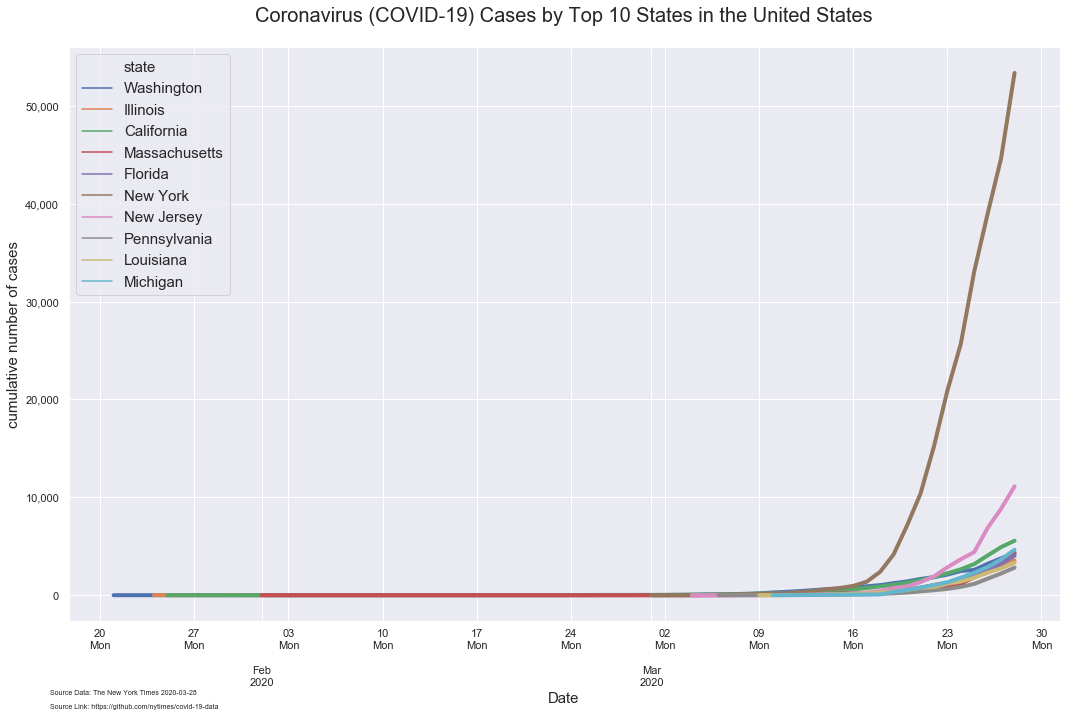

In [12]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="date", y="cases",
             hue="state",
             data=top_10_ts, linewidth=4)

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(fontsize=15)
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('cumulative number of cases', fontsize=15)
plt.title('Coronavirus (COVID-19) Cases by Top 10 States in the United States', pad = 25, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=7)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-timeseries-032720')

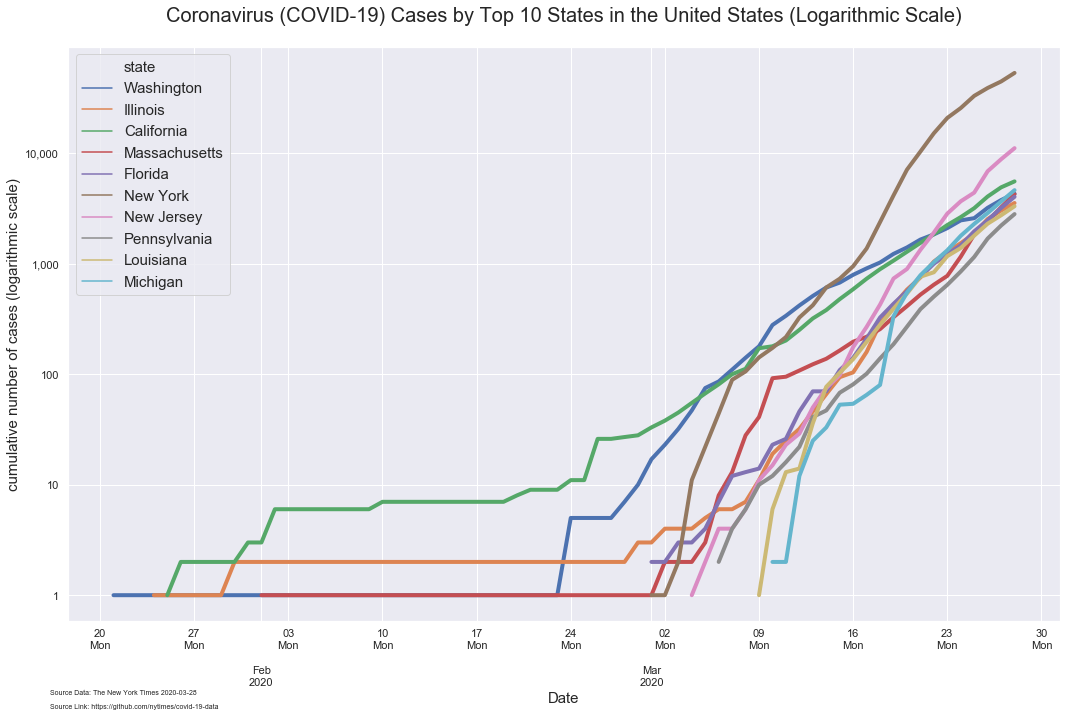

In [13]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="date", y="cases",
             hue="state",
             data=top_10_ts, linewidth=4)
ax1.set_yscale('log')

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(fontsize=15)
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('cumulative number of cases (logarithmic scale)', fontsize=15)
plt.title('Coronavirus (COVID-19) Cases by Top 10 States in the United States (Logarithmic Scale)', pad = 25, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=7)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-timeseries-log-032720')

In [14]:
state_first_case = top_10_ts.sort_values(by=['date', 'cases'], ascending=[True, True], ).drop_duplicates(subset ="state", keep = 'first').reset_index(drop=True)

In [15]:
state_first_case = state_first_case[['date', 'state']]
state_first_case.rename(columns={'date': 'date_first_case'}, inplace=True)

In [16]:
state_first_case

,date_first_case,state
0,2020-01-21,Washington
1,2020-01-24,Illinois
2,2020-01-25,California
3,2020-02-01,Massachusetts
4,2020-03-01,New York
5,2020-03-01,Florida
6,2020-03-04,New Jersey
7,2020-03-06,Pennsylvania
8,2020-03-09,Louisiana
9,2020-03-10,Michigan


In [17]:
state_first_case = top_10_ts.merge(state_first_case, left_on='state', right_on='state')

In [18]:
state_first_case

,date,state,fips,cases,deaths,date_first_case
0,2020-01-21,Washington,53,1,0,2020-01-21
1,2020-01-22,Washington,53,1,0,2020-01-21
2,2020-01-23,Washington,53,1,0,2020-01-21
3,2020-01-24,Washington,53,1,0,2020-01-21
4,2020-01-25,Washington,53,1,0,2020-01-21
...,...,...,...,...,...,...
392,2020-03-24,Michigan,26,1791,24,2020-03-10
393,2020-03-25,Michigan,26,2294,43,2020-03-10
394,2020-03-26,Michigan,26,2878,63,2020-03-10
395,2020-03-27,Michigan,26,3657,93,2020-03-10


In [19]:
state_first_case['time_difference'] = (state_first_case['date'] - state_first_case['date_first_case']).dt.days

In [20]:
state_first_case.sort_values(by='date')

,date,state,fips,cases,deaths,date_first_case,time_difference
0,2020-01-21,Washington,53,1,0,2020-01-21,0
1,2020-01-22,Washington,53,1,0,2020-01-21,1
2,2020-01-23,Washington,53,1,0,2020-01-21,2
68,2020-01-24,Illinois,17,1,0,2020-01-24,0
3,2020-01-24,Washington,53,1,0,2020-01-21,3
...,...,...,...,...,...,...,...
196,2020-03-28,California,6,5565,121,2020-01-25,63
281,2020-03-28,Florida,12,4038,56,2020-03-01,27
334,2020-03-28,New Jersey,34,11124,140,2020-03-04,24
253,2020-03-28,Massachusetts,25,4257,44,2020-02-01,56


In [21]:
state_first_case.sort_values(by='time_difference')

,date,state,fips,cases,deaths,date_first_case,time_difference
0,2020-01-21,Washington,53,1,0,2020-01-21,0
133,2020-01-25,California,6,1,0,2020-01-25,0
197,2020-02-01,Massachusetts,25,1,0,2020-02-01,0
254,2020-03-01,Florida,12,2,0,2020-03-01,0
282,2020-03-01,New York,36,1,0,2020-03-01,0
...,...,...,...,...,...,...,...
64,2020-03-25,Washington,53,2585,130,2020-01-21,64
132,2020-03-28,Illinois,17,3547,50,2020-01-24,64
65,2020-03-26,Washington,53,3208,151,2020-01-21,65
66,2020-03-27,Washington,53,3770,177,2020-01-21,66


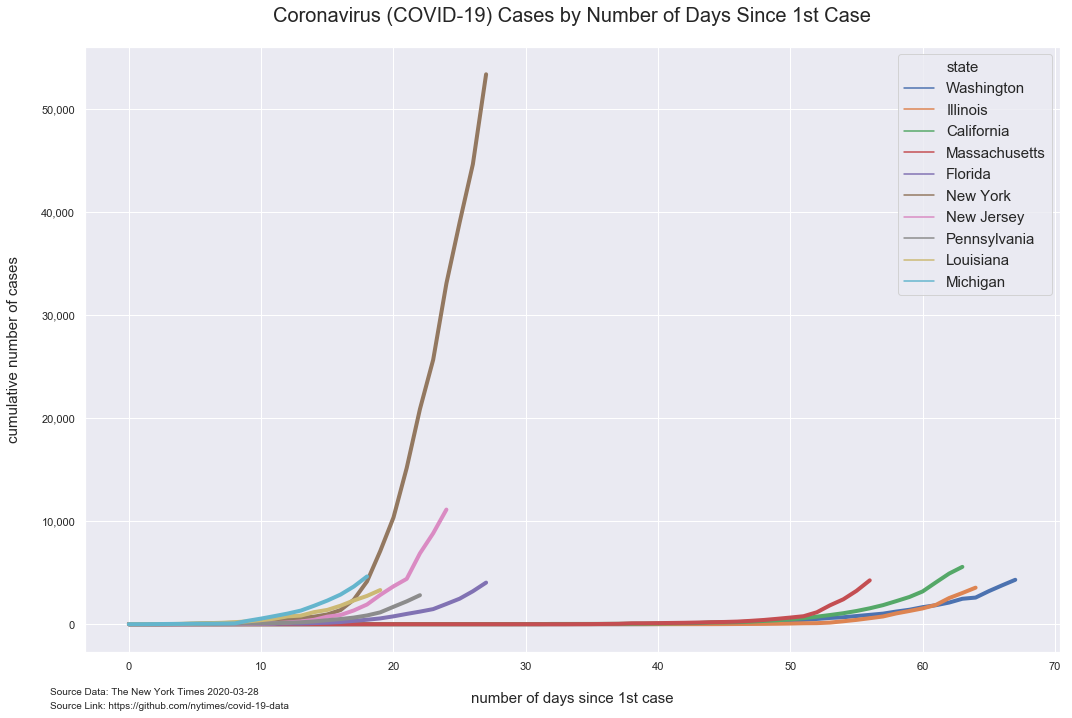

In [80]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="time_difference", y="cases",
             hue="state",
             data=state_first_case, linewidth=4)
#ax1.set_yscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.grid(True)
ax1.grid(axis='x', which='minor')
ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 20

ax1.legend(fontsize=15)
ax1.set_xlabel('number of days since 1st case', fontsize=15)
ax1.set_ylabel('cumulative number of cases', fontsize=15)
plt.title('Coronavirus (COVID-19) Cases by Number of Days Since 1st Case', pad = 25, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-timeseries-first-case-032720')

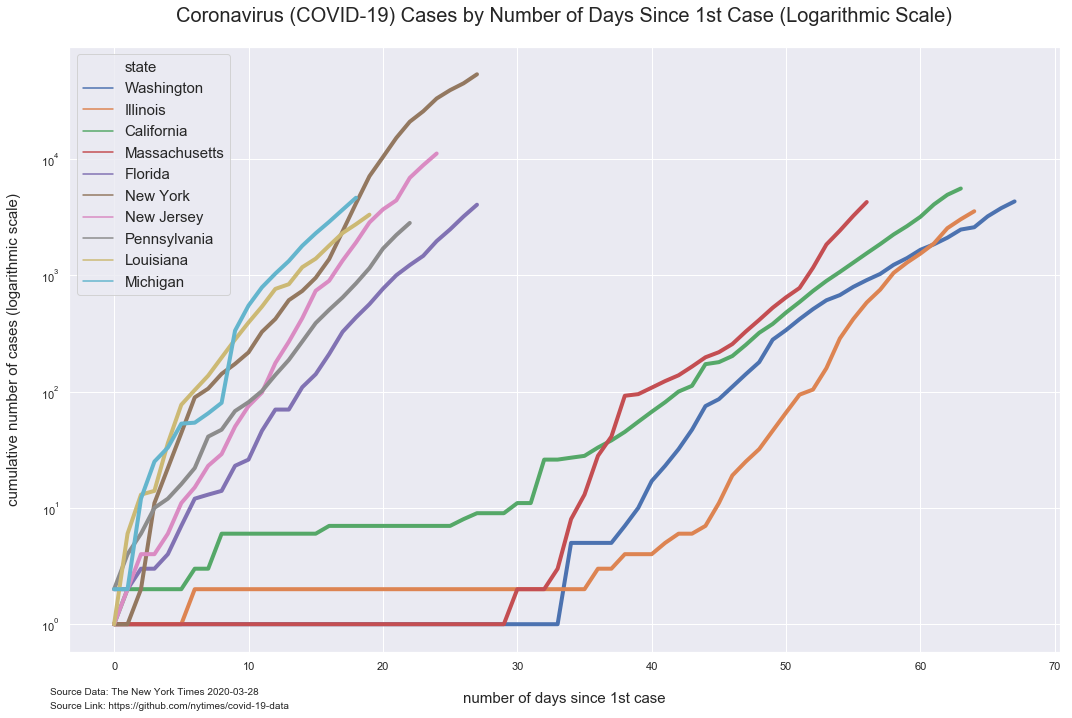

In [81]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="time_difference", y="cases",
             hue="state",
             data=state_first_case, linewidth=4)
ax1.set_yscale('log')

ax1.xaxis.grid(True, which="major")

ax1.grid(True)
ax1.grid(axis='x', which='minor')
ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 20

ax1.legend(fontsize=15)
ax1.set_xlabel('number of days since 1st case', fontsize=15)
ax1.set_ylabel('cumulative number of cases (logarithmic scale)', fontsize=15)
plt.title('Coronavirus (COVID-19) Cases by Number of Days Since 1st Case (Logarithmic Scale)', pad = 25, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-timeseries-first-case-log-032720')

In [25]:
state_first_case

,date,state,fips,cases,deaths,date_first_case,time_difference
0,2020-01-21,Washington,53,1,0,2020-01-21,0
1,2020-01-22,Washington,53,1,0,2020-01-21,1
2,2020-01-23,Washington,53,1,0,2020-01-21,2
3,2020-01-24,Washington,53,1,0,2020-01-21,3
4,2020-01-25,Washington,53,1,0,2020-01-21,4
...,...,...,...,...,...,...,...
392,2020-03-24,Michigan,26,1791,24,2020-03-10,14
393,2020-03-25,Michigan,26,2294,43,2020-03-10,15
394,2020-03-26,Michigan,26,2878,63,2020-03-10,16
395,2020-03-27,Michigan,26,3657,93,2020-03-10,17


In [55]:
state_ten_cases = top_10_ts.loc[top_10_ts.cases >= 10]

In [56]:
state_ten_cases = state_ten_cases.sort_values(by=['date', 'cases'], ascending=[True, True], ).drop_duplicates(subset ="state", keep = 'first').reset_index(drop=True)

In [57]:
state_ten_cases = state_ten_cases[['date', 'state']]
state_ten_cases.rename(columns={'date': 'date_ten_case'}, inplace=True)

In [58]:
state_ten_cases

,date_ten_case,state
0,2020-02-24,California
1,2020-02-29,Washington
2,2020-03-04,New York
3,2020-03-07,Florida
4,2020-03-07,Massachusetts
5,2020-03-09,Pennsylvania
6,2020-03-09,Illinois
7,2020-03-09,New Jersey
8,2020-03-11,Louisiana
9,2020-03-12,Michigan


In [59]:
state_ten_cases = top_10_ts.merge(state_ten_cases, left_on='state', right_on='state')

In [60]:
state_ten_cases

,date,state,fips,cases,deaths,date_ten_case
0,2020-01-21,Washington,53,1,0,2020-02-29
1,2020-01-22,Washington,53,1,0,2020-02-29
2,2020-01-23,Washington,53,1,0,2020-02-29
3,2020-01-24,Washington,53,1,0,2020-02-29
4,2020-01-25,Washington,53,1,0,2020-02-29
...,...,...,...,...,...,...
392,2020-03-24,Michigan,26,1791,24,2020-03-12
393,2020-03-25,Michigan,26,2294,43,2020-03-12
394,2020-03-26,Michigan,26,2878,63,2020-03-12
395,2020-03-27,Michigan,26,3657,93,2020-03-12


In [61]:
state_ten_cases = state_ten_cases.loc[state_ten_cases.cases >= 10]

In [62]:
state_ten_cases

,date,state,fips,cases,deaths,date_ten_case
39,2020-02-29,Washington,53,10,1,2020-02-29
40,2020-03-01,Washington,53,17,3,2020-02-29
41,2020-03-02,Washington,53,23,6,2020-02-29
42,2020-03-03,Washington,53,32,10,2020-02-29
43,2020-03-04,Washington,53,47,11,2020-02-29
...,...,...,...,...,...,...
392,2020-03-24,Michigan,26,1791,24,2020-03-12
393,2020-03-25,Michigan,26,2294,43,2020-03-12
394,2020-03-26,Michigan,26,2878,63,2020-03-12
395,2020-03-27,Michigan,26,3657,93,2020-03-12


In [64]:
state_ten_cases['time_difference'] = (state_ten_cases['date'] - state_ten_cases['date_ten_case']).dt.days

/Users/geribauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


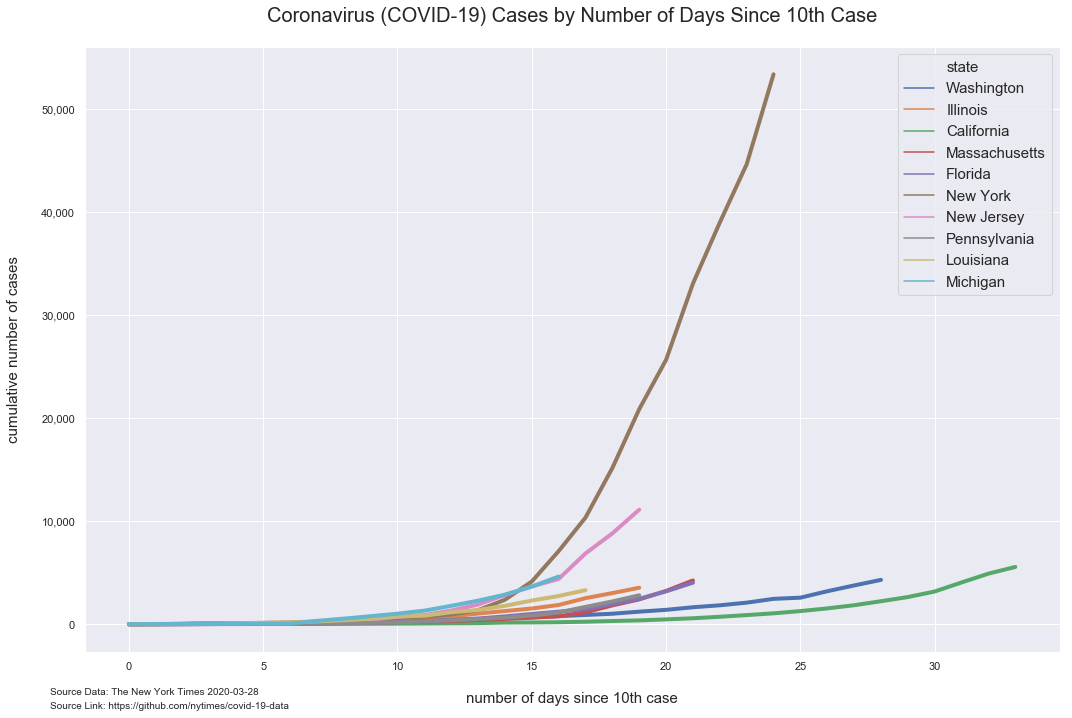

In [77]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="time_difference", y="cases",
             hue="state",
             data=state_ten_cases, linewidth=4)
#ax1.set_yscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.grid(True)
ax1.grid(axis='x', which='minor')
ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 20

ax1.legend(fontsize=15)
ax1.set_xlabel('number of days since 10th case', fontsize=15)
ax1.set_ylabel('cumulative number of cases', fontsize=15)
plt.title('Coronavirus (COVID-19) Cases by Number of Days Since 10th Case', pad = 25, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-timeseries-tenth-case-032720')

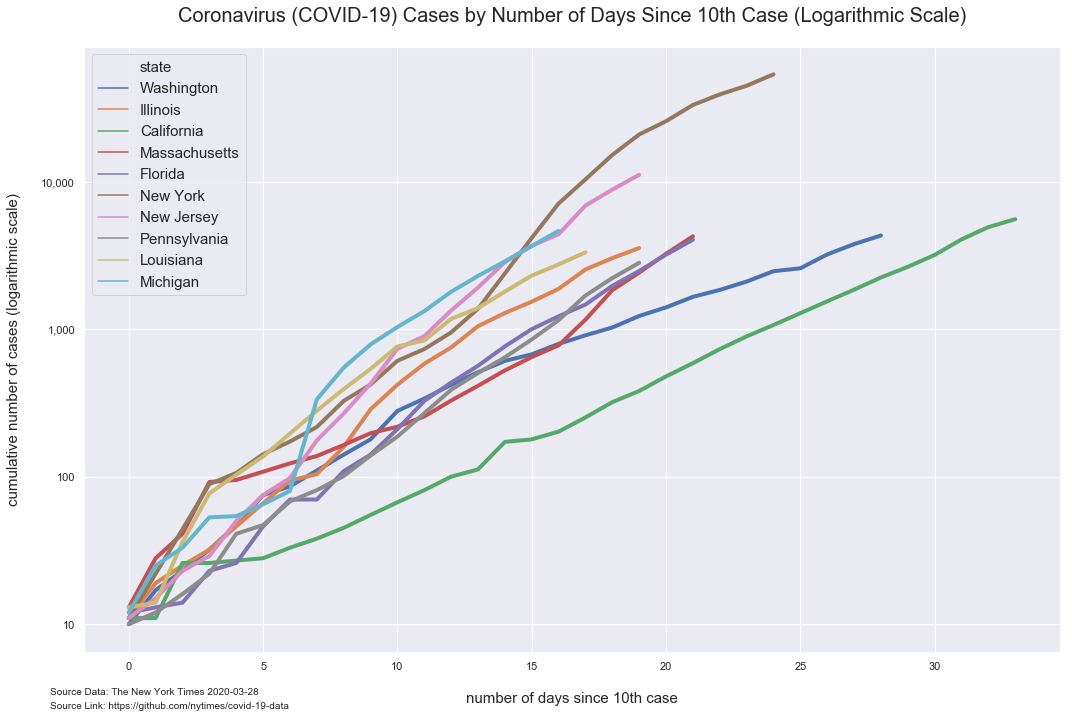

In [76]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="time_difference", y="cases",
             hue="state",
             data=state_ten_cases, linewidth=4)
ax1.set_yscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.grid(True)
ax1.grid(axis='x', which='minor')
ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 20

ax1.legend(fontsize=15)
ax1.set_xlabel('number of days since 10th case', fontsize=15)
ax1.set_ylabel('cumulative number of cases (logarithmic scale)', fontsize=15)
plt.title('Coronavirus (COVID-19) Cases by Number of Days Since 10th Case (Logarithmic Scale)', pad = 25, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-timeseries-tenth-case-log-032720')

In [31]:
g = covid_19_state_data.groupby('date')['cases'].sum().reset_index()

g.set_index('date', drop=False, inplace=True)

g.index = pd.to_datetime(g.index, infer_datetime_format=True)

In [32]:
g.index.dtype

dtype('<M8[ns]')

In [33]:
g.head()

,date,cases
date,,
2020-01-21,2020-01-21,1
2020-01-22,2020-01-22,1
2020-01-23,2020-01-23,1
2020-01-24,2020-01-24,2
2020-01-25,2020-01-25,3


In [34]:
g.tail()

,date,cases
date,,
2020-03-23,2020-03-23,43499
2020-03-24,2020-03-24,53938
2020-03-25,2020-03-25,68516
2020-03-26,2020-03-26,85533
2020-03-27,2020-03-27,102497


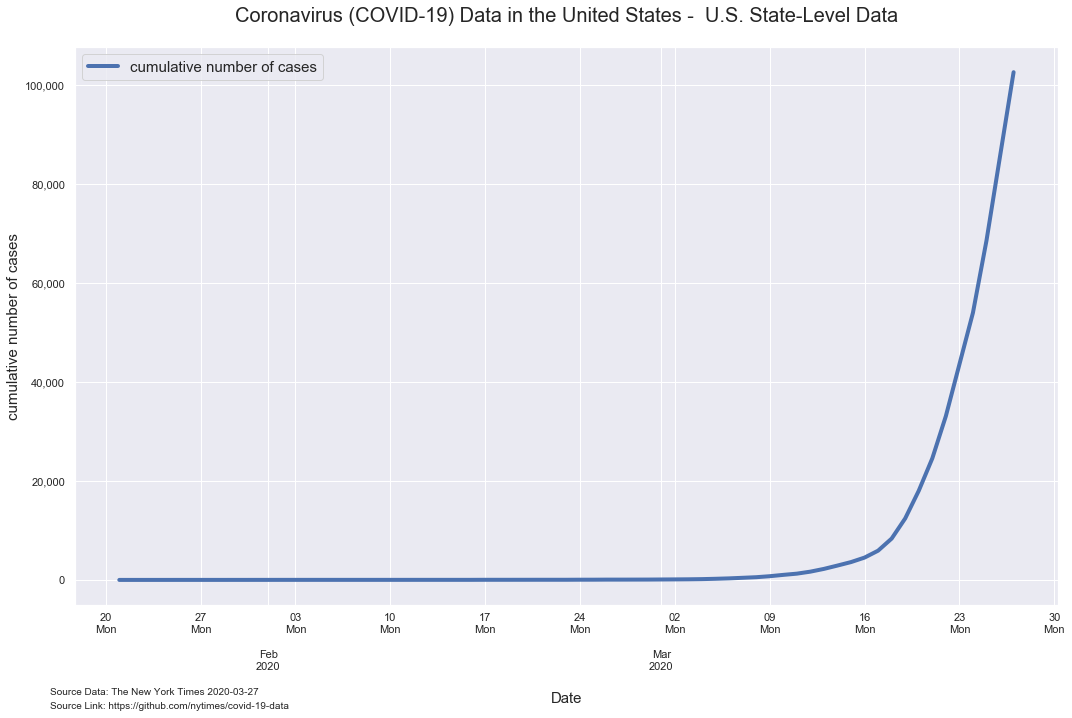

In [36]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

ax1.plot(g['cases'], linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.set_xlabel('Date', fontsize=15, labelpad = 20)
ax1.set_ylabel('cumulative number of cases', fontsize=15)

ax1.grid(True)
ax1.grid(which='minor')

ax1.legend(['cumulative number of cases'], loc=2, fontsize=15)
plt.title('Coronavirus (COVID-19) Data in the United States -  U.S. State-Level Data', pad = 25, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-linear-032720')

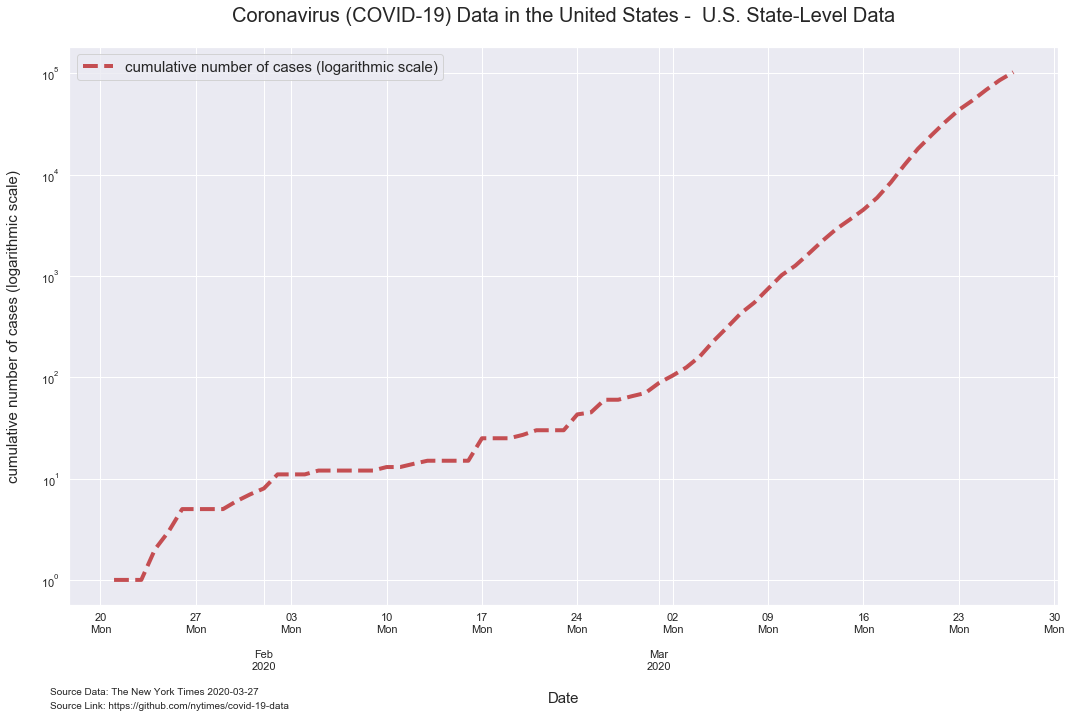

In [37]:
fig, ax2 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

ax2.plot(g['cases'], linewidth=4, color='r', linestyle='dashed')

ax2.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax2.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax2.xaxis.grid(True, which="major")
ax2.xaxis.set_major_locator(dates.MonthLocator())
ax2.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax2.set_xlabel('Date', fontsize=15, labelpad = 20)
ax2.set_ylabel('cumulative number of cases (logarithmic scale)', fontsize=15, labelpad = 20)

ax2.grid(True)
ax2.grid(which='minor', axis='x')

ax2.legend(['cumulative number of cases (logarithmic scale)'], loc=0, fontsize=15)
plt.title('Coronavirus (COVID-19) Data in the United States -  U.S. State-Level Data', pad = 25, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

ax2.set_yscale('log')
plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-log-032720')

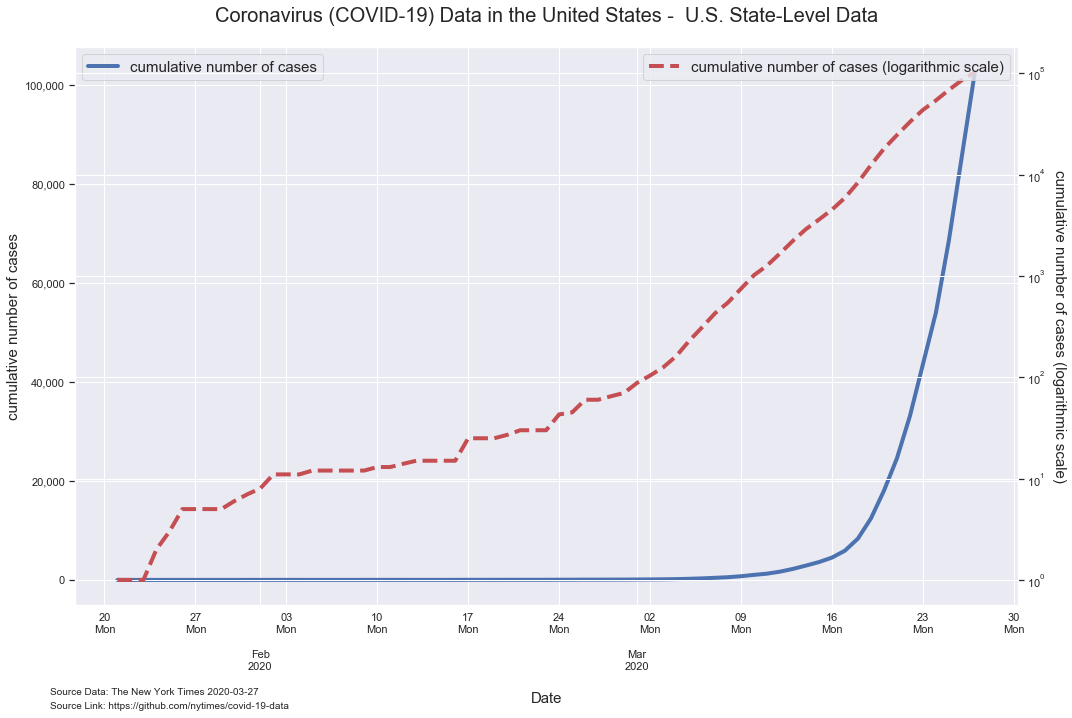

In [38]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

# Plot 1
ax1.plot(g['cases'], linewidth=4)

# Plot 2
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(g['cases'], linewidth=4, color='r', linestyle='dashed')

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0),interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax2.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))

ax1.set_ylabel('cumulative number of cases', fontsize=15)
ax1.set_xlabel('Date', fontsize=15, labelpad = 20)
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.set_ylabel('cumulative number of cases (logarithmic scale)', fontsize=15, rotation = 270, labelpad = 20)
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.get_yaxis().set_visible(True)
ax2.set_yscale('log')

ax1.grid(True)
ax1.grid(which='minor')
ax2.tick_params(axis='both', which='minor', length=0)
plt.setp(ax2.get_yticklabels(), visible=True)

ax1.legend(['cumulative number of cases'], loc=2, fontsize=15)
ax2.legend(['cumulative number of cases (logarithmic scale)'], loc=1, fontsize=15)
plt.title('Coronavirus (COVID-19) Data in the United States -  U.S. State-Level Data', pad = 25, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-overlay-032720')

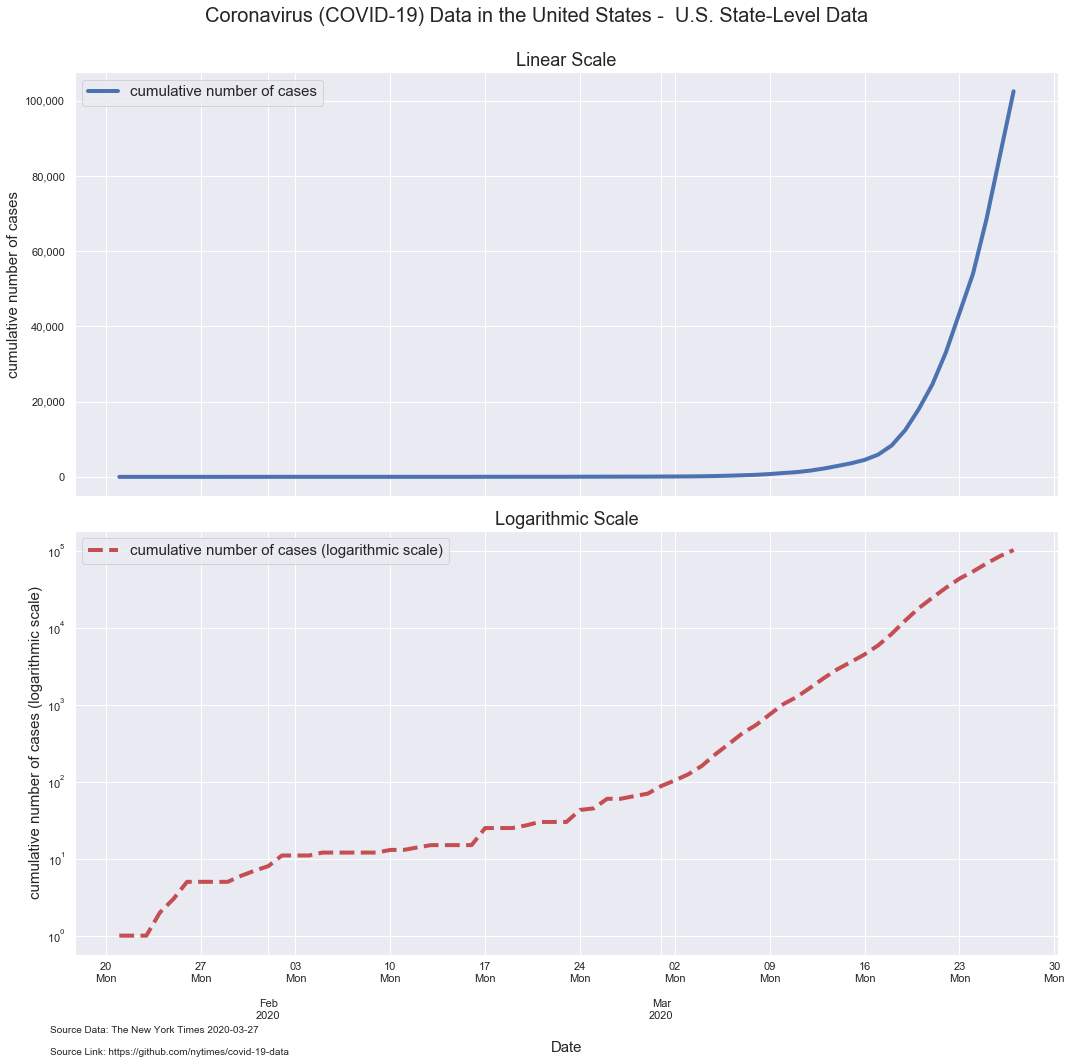

In [39]:
fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True, figsize=(15,15))
fig.suptitle('Coronavirus (COVID-19) Data in the United States -  U.S. State-Level Data', fontsize=20)
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

# Plot 1
ax1.plot(g['cases'], linewidth=4)
ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.set_ylabel('cumulative number of cases', fontsize=15)
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))

# Formatting Grid
ax1.grid(True)
ax1.grid(which='minor')

# Plot 2
ax2.plot(g['cases'], linewidth=4, color='r', linestyle='dashed')
ax2.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax2.set_ylabel('cumulative number of cases (logarithmic scale)', fontsize=15)
ax2.set_xlabel('Date', fontsize=15, labelpad = 20)
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax2.xaxis.grid(True, which="major")
ax2.xaxis.set_major_locator(dates.MonthLocator())
ax2.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))

# Formatting Grid
ax2.grid(True)
ax2.grid(which='minor', axis='x')

# Formatting Figure
ax1.legend(['cumulative number of cases'], loc=2, fontsize=15)
ax2.legend(['cumulative number of cases (logarithmic scale)'], loc=2, fontsize=15)
ax1.set_title('Linear Scale', fontsize=18)
ax2.set_title('Logarithmic Scale', fontsize=18)
ax2.set_yscale('log')

plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
fig.subplots_adjust(top=0.92)
plt.savefig('figures/nyt-covid-19-data-2subplots-032720')

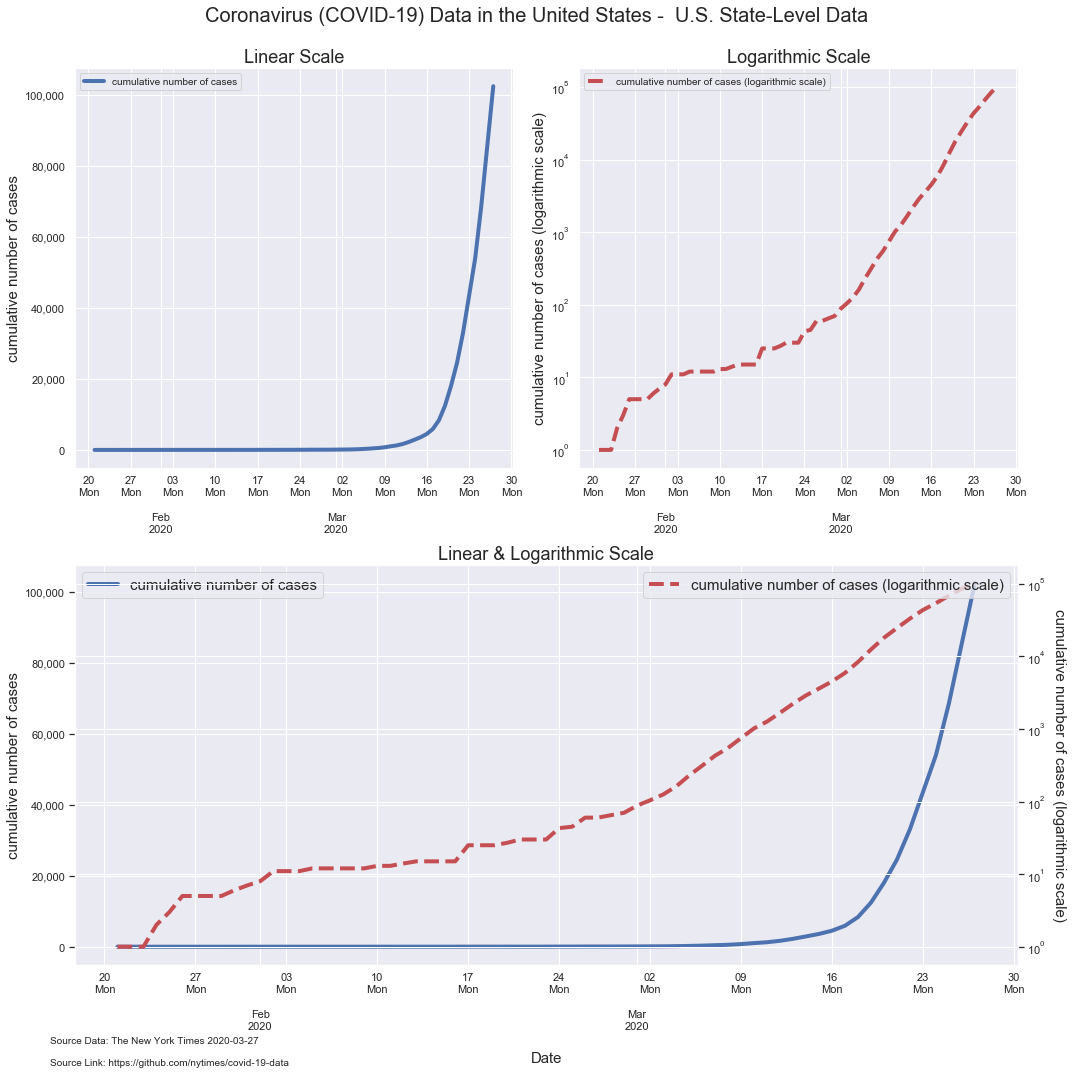

In [40]:
fig, [ax1, ax2, ax3, ax3_1] = plt.subplots(4, 1, sharex=True, figsize=(15,15))
fig.suptitle('Coronavirus (COVID-19) Data in the United States -  U.S. State-Level Data', y = .99, fontsize=20)
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

# Plot 1
ax3 = plt.subplot(212)
ax3.plot(g['cases'], linewidth=4)
ax3.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax3.set_xlabel('Date', fontsize=15, labelpad = 20)
ax3.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax3_1 = ax3.twinx()  # instantiate a second axes that shares the same x-axis
ax3_1.plot(g['cases'], linewidth=4, color='r', linestyle='dashed')
ax3_1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax3_1.xaxis.grid(True, which="major")
ax3_1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax3_1.set_yscale('log')

ax3.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax3.xaxis.grid(True, which="major")
ax3.xaxis.set_major_locator(dates.MonthLocator())
ax3.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))

# Plot 2
ax1 = plt.subplot(221)
ax1.plot(g['cases'], linewidth=4)
ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))


# Plot 3
ax2 = plt.subplot(222)
ax2.plot(g['cases'], linewidth=4, color='r', linestyle='dashed')
ax2.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))

ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax2.xaxis.grid(True, which="major")
ax2.xaxis.set_major_locator(dates.MonthLocator())
ax2.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))

# Formatting Grid
ax1.grid(True)
ax1.grid(which='minor')
ax2.grid(True)
ax2.grid(which='minor', axis='x')
ax3.grid(True)
ax3.grid(which='minor')
ax3_1.grid(True)
ax3_1.grid(which='minor', axis='x')
ax3_1.tick_params(axis='both', which='minor', length=0)

# Setting Labels
ax1.set_ylabel('cumulative number of cases', fontsize=15)
ax2.set_ylabel('cumulative number of cases (logarithmic scale)', fontsize=15)
ax3.set_ylabel('cumulative number of cases', fontsize=15)
ax3.set_xlabel('Date', fontsize=15, labelpad = 20)
ax3_1.set_ylabel('cumulative number of cases (logarithmic scale)', fontsize=15, rotation = 270, labelpad = 20)
ax2.get_yaxis().set_visible(True)
ax2.set_yscale('log')
ax2.get_yaxis().set_visible(True)
ax3_1.get_yaxis().set_visible(True)
ax3_1.set_yscale('log')
ax3_1.get_yaxis().set_visible(True)

# Setting Titles
ax1.set_title('\n\nLinear Scale', fontsize=18)
ax2.set_title('Logarithmic Scale', fontsize=18)
ax3.set_title('Linear & Logarithmic Scale', fontsize=18)

# Setting Legends
ax1.legend(['cumulative number of cases'], loc=2, fontsize=10)
ax2.legend(['cumulative number of cases (logarithmic scale)'], loc=2, fontsize=10)
ax3.legend(['cumulative number of cases'], loc=2, fontsize=15)
ax3_1.legend(['cumulative number of cases (logarithmic scale)'], loc=1, fontsize=15)

plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-3subplots-032720')

In [41]:
covid_19_state_data

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
1381,2020-03-27,Virginia,51,606,14
1382,2020-03-27,Washington,53,3770,177
1383,2020-03-27,West Virginia,54,96,0
1384,2020-03-27,Wisconsin,55,930,16


In [102]:
# dropping ALL duplicte values 
state_current_cases = covid_19_state_data.sort_values(by = 'date', 
                    ascending=False).drop_duplicates(
                    subset ="state", keep = 'first')

In [103]:
state_current_cases.head()

,date,state,fips,cases,deaths
1436,2020-03-28,Wyoming,56,84,0
1411,2020-03-28,Missouri,29,838,10
1409,2020-03-28,Minnesota,27,441,5
1408,2020-03-28,Michigan,26,4635,111
1407,2020-03-28,Massachusetts,25,4257,44


In [104]:
state_current_cases.state.value_counts()

Arizona                 1
North Carolina          1
Texas                   1
Nevada                  1
North Dakota            1
Connecticut             1
New Jersey              1
Colorado                1
District of Columbia    1
Wyoming                 1
South Dakota            1
South Carolina          1
Oklahoma                1
Alabama                 1
Ohio                    1
Indiana                 1
Utah                    1
Hawaii                  1
Nebraska                1
Rhode Island            1
Louisiana               1
Delaware                1
Oregon                  1
Tennessee               1
Wisconsin               1
Washington              1
Illinois                1
New York                1
California              1
Kansas                  1
Maine                   1
Kentucky                1
Georgia                 1
Virgin Islands          1
Alaska                  1
Mississippi             1
Florida                 1
New Mexico              1
Arkansas    

In [105]:
state_current_cases.loc[state_current_cases.state == 'New York']

,date,state,fips,cases,deaths
1418,2020-03-28,New York,36,53363,782


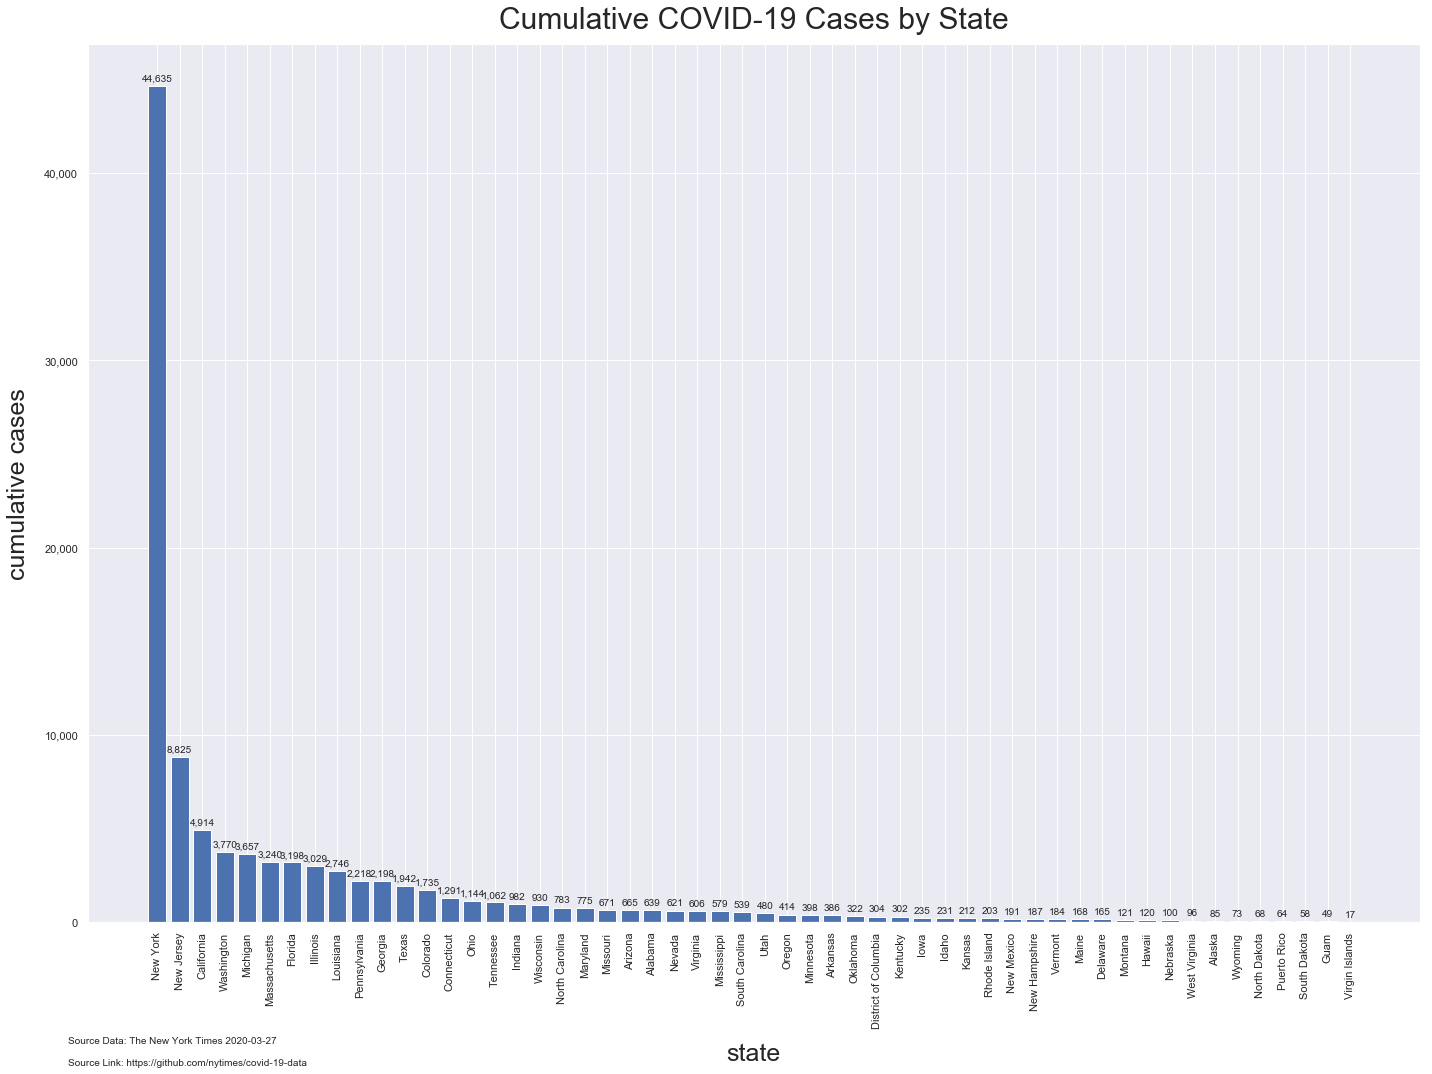

In [46]:
bar = state_current_cases.sort_values(by = 'cases', 
                    ascending=False)
bar.set_index('state', drop=False, inplace=True)

plt.subplots(figsize=(20,15))
ax = plt.subplot()

label = ax.bar(bar.index, bar.cases)
plt.xlabel("state", labelpad=14, fontsize=25)
plt.xticks(rotation=90)
plt.ylabel("cumulative cases", labelpad=14, fontsize=25)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:,}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(label)

txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.title("Cumulative COVID-19 Cases by State", pad=16, fontsize=30)
plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-bar-032720')

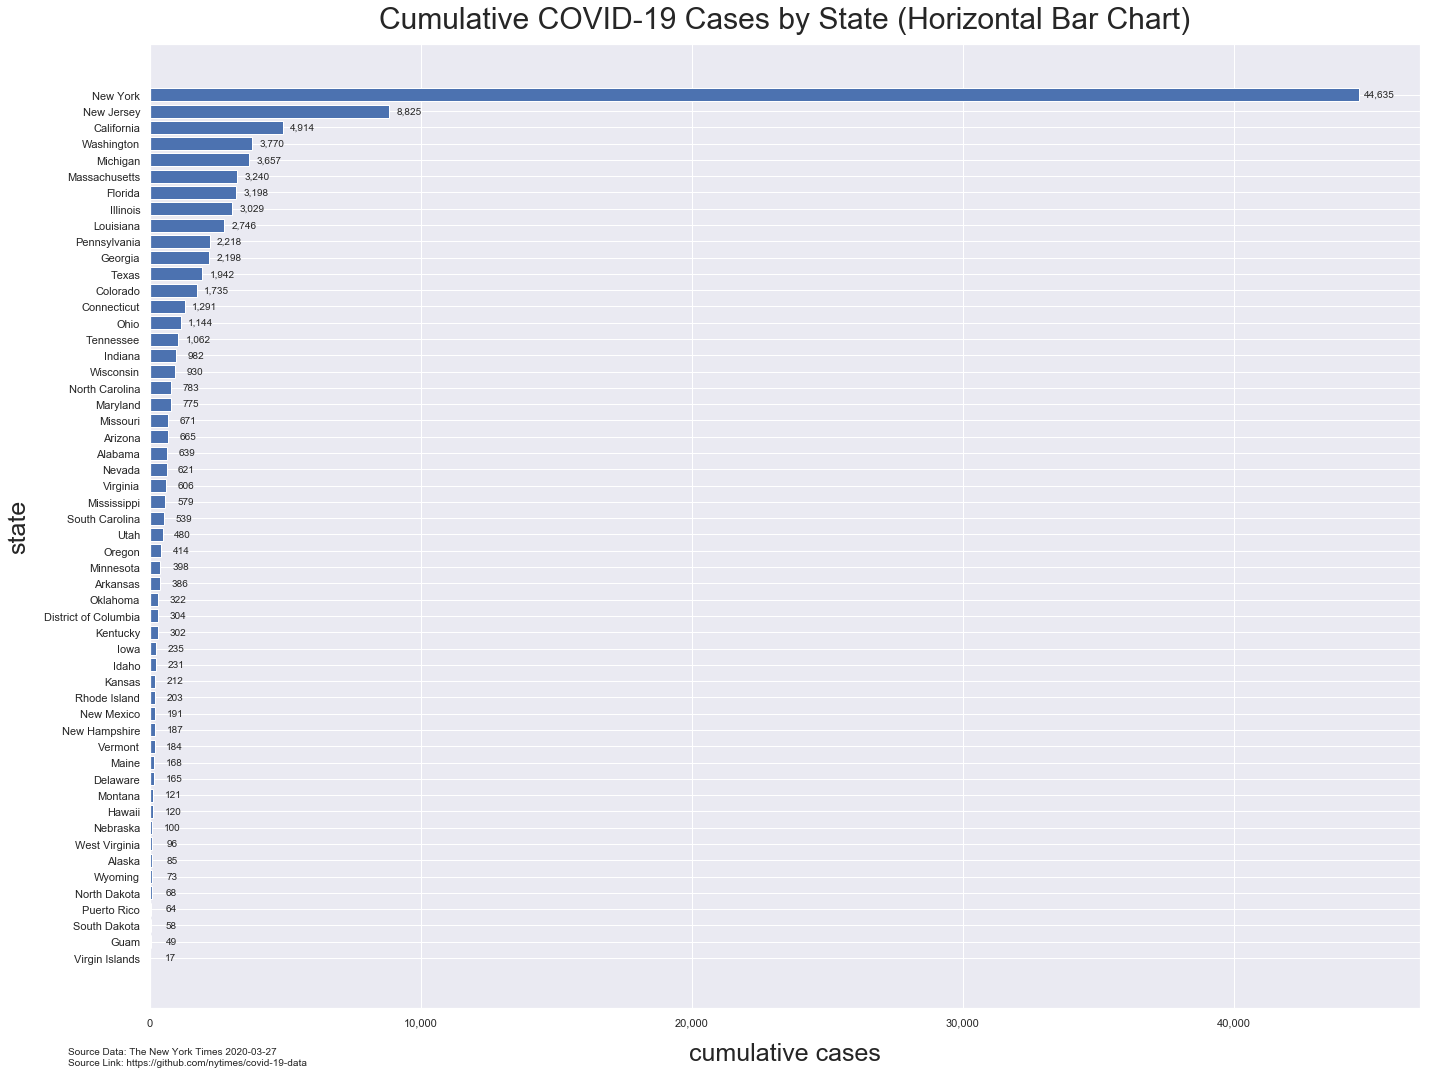

In [47]:
bar = state_current_cases.sort_values(by = 'cases', 
                    ascending=True)
bar.set_index('state', drop=False, inplace=True)

plt.subplots(figsize=(20,15))
ax = plt.subplot()

label_1 = ax.barh(bar.index, bar.cases)
plt.xlabel("cumulative cases", labelpad=14, fontsize=25)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel("state", labelpad=14, fontsize=25)

def autolabel_1(rects):
    for rect in rects:
        width = rect.get_width()
        yloc = rect.get_y() + rect.get_height() / 2
        ax.annotate('{:,}'.format(width), 
                    xy=(width, yloc), 
                    xytext=(20, 0),
                    textcoords="offset points",
                    ha='center', va='center')
                
autolabel_1(label_1)

txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')
plt.figtext(0.05, 0.02, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.title("Cumulative COVID-19 Cases by State (Horizontal Bar Chart)", pad=16, fontsize=30)
plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-barh-032720')

In [48]:
bar.head()

,date,state,fips,cases,deaths
state,,,,,
Virgin Islands,2020-03-26,Virgin Islands,78,17,0
Guam,2020-03-26,Guam,66,49,1
South Dakota,2020-03-27,South Dakota,46,58,1
Puerto Rico,2020-03-26,Puerto Rico,72,64,2
North Dakota,2020-03-27,North Dakota,38,68,1


In [60]:
bar.dtypes

date      object
state     object
fips       int64
cases      int64
deaths     int64
dtype: object

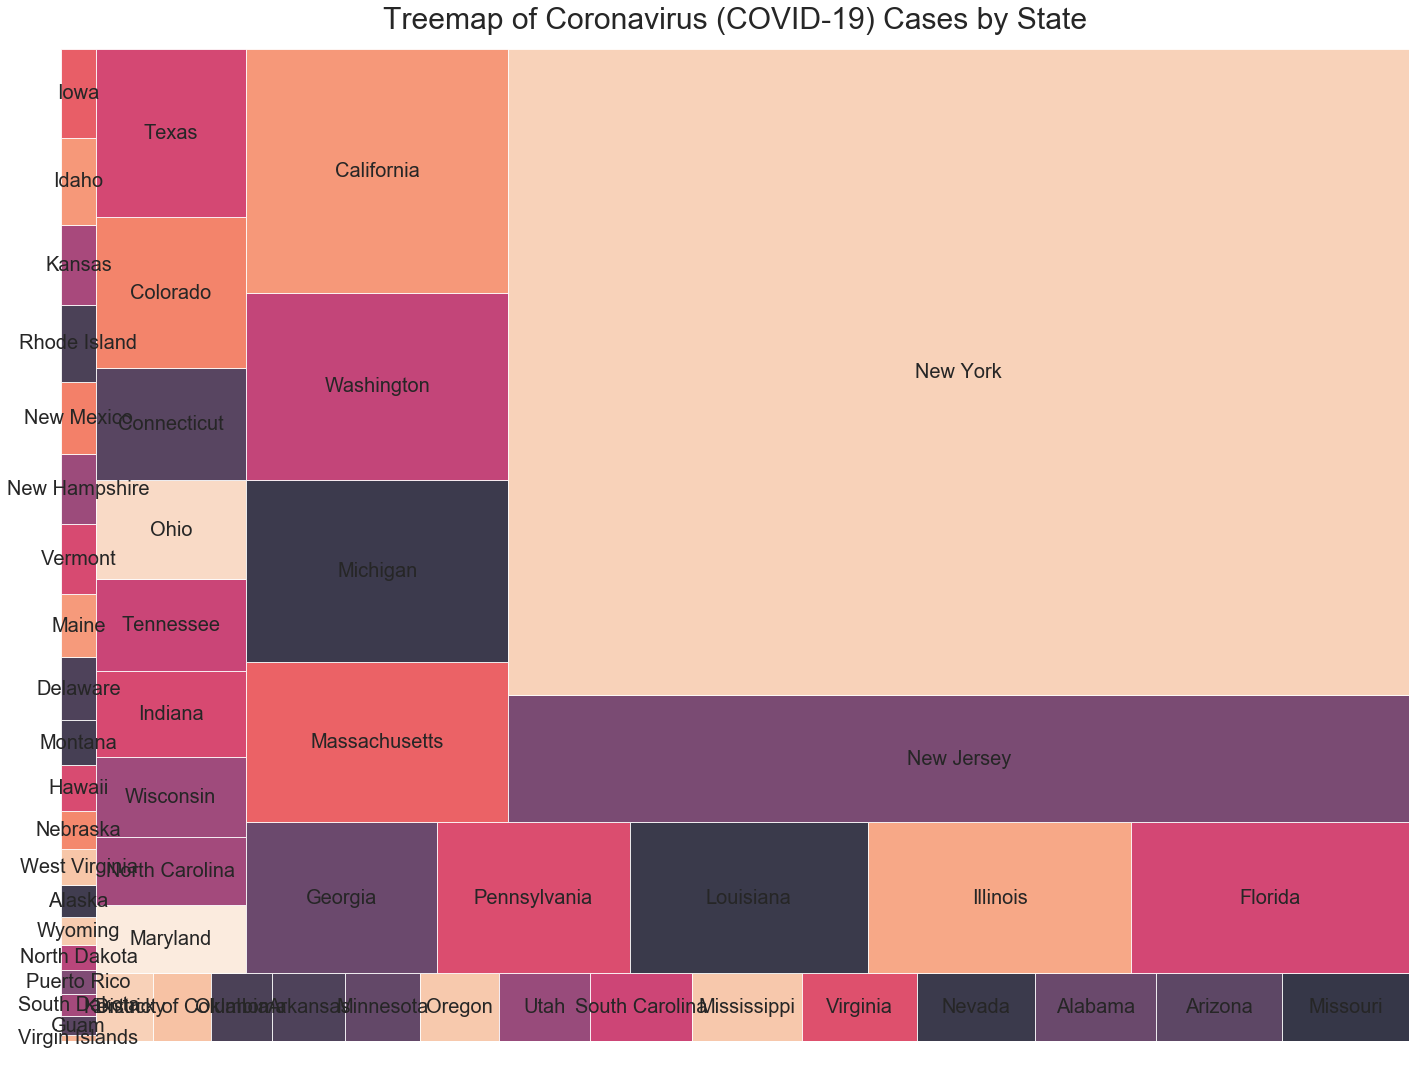

In [59]:
fig, ax = plt.subplots(figsize=(20,15))
squarify.plot(sizes=bar['cases'], label=bar['state'], alpha=.8, ax=ax, text_kwargs={'fontsize':20})
ax.set_title('Treemap of Coronavirus (COVID-19) Cases by State', fontsize=30, pad = 20)
plt.axis('off')
plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-treemap-032720')

In [49]:
covid_19_state_data.to_csv('data/us-states-raw-data-032720.csv', index=False)
g.to_csv('data/us-states-grouped-day-032720.csv')
bar.to_csv('data/us-states-grouped-states-032720.csv')

In [418]:
url = 'https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip'

data_path = 'data'
fullfilename = os.path.join(data_path, 'state_shape.gz')
urllib.request.urlretrieve(url, fullfilename)

('data/state_shape.gz', <http.client.HTTPMessage at 0x1a2380e7f0>)

In [419]:
file_path = 'data/state_shape.gz'

items = zipfile.ZipFile(file_path)

# available files in the container
print(items.namelist())

['cb_2018_us_state_500k.shp.ea.iso.xml', 'cb_2018_us_state_500k.shp.iso.xml', 'cb_2018_us_state_500k.shp', 'cb_2018_us_state_500k.shx', 'cb_2018_us_state_500k.dbf', 'cb_2018_us_state_500k.prj', 'cb_2018_us_state_500k.cpg']


In [420]:
# opening Zip using 'with' keyword in read mode
with zipfile.ZipFile(file_path, 'r') as file:
    file.extractall(data_path)

In [50]:
states_shape = gpd.GeoDataFrame.from_file('data/cb_2018_us_state_500k.shp')

In [51]:
states_shape.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"(POLYGON ((-88.502966 30.215235, -88.491759 30..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"(POLYGON ((-75.72680699999999 35.935844, -75.7..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.002565 36.526588, -103.002188 3..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"(POLYGON ((-75.742406 37.80835, -75.741512 37...."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6431981036679 38.1690897960737, ..."


In [52]:
bar_drop_index = bar.reset_index(drop=True)

states_shape_cases = states_shape.merge(bar_drop_index, left_on='NAME', right_on='state')

In [53]:
states_shape_cases.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,date,state,fips,cases,deaths
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"(POLYGON ((-88.502966 30.215235, -88.491759 30...",2020-03-27,Mississippi,28,579,8
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"(POLYGON ((-75.72680699999999 35.935844, -75.7...",2020-03-27,North Carolina,37,783,3
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.002565 36.526588, -103.002188 3...",2020-03-27,Oklahoma,40,322,8
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"(POLYGON ((-75.742406 37.80835, -75.741512 37....",2020-03-27,Virginia,51,606,14
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6431981036679 38.1690897960737, ...",2020-03-27,West Virginia,54,96,0


In [54]:
states_shape_cases.STUSPS.unique()

array(['MS', 'NC', 'OK', 'VA', 'WV', 'LA', 'MI', 'MA', 'ID', 'FL', 'NE',
       'WA', 'NM', 'PR', 'SD', 'TX', 'CA', 'AL', 'GA', 'PA', 'MO', 'CO',
       'UT', 'TN', 'WY', 'NY', 'KS', 'AK', 'NV', 'IL', 'VT', 'MT', 'IA',
       'SC', 'NH', 'AZ', 'DC', 'NJ', 'MD', 'ME', 'HI', 'DE', 'GU', 'RI',
       'KY', 'OH', 'WI', 'OR', 'ND', 'AR', 'IN', 'MN', 'CT'], dtype=object)

(-2259318.989842429,
 2743787.7776512564,
 -2259441.9737315555,
 874818.5571526419)

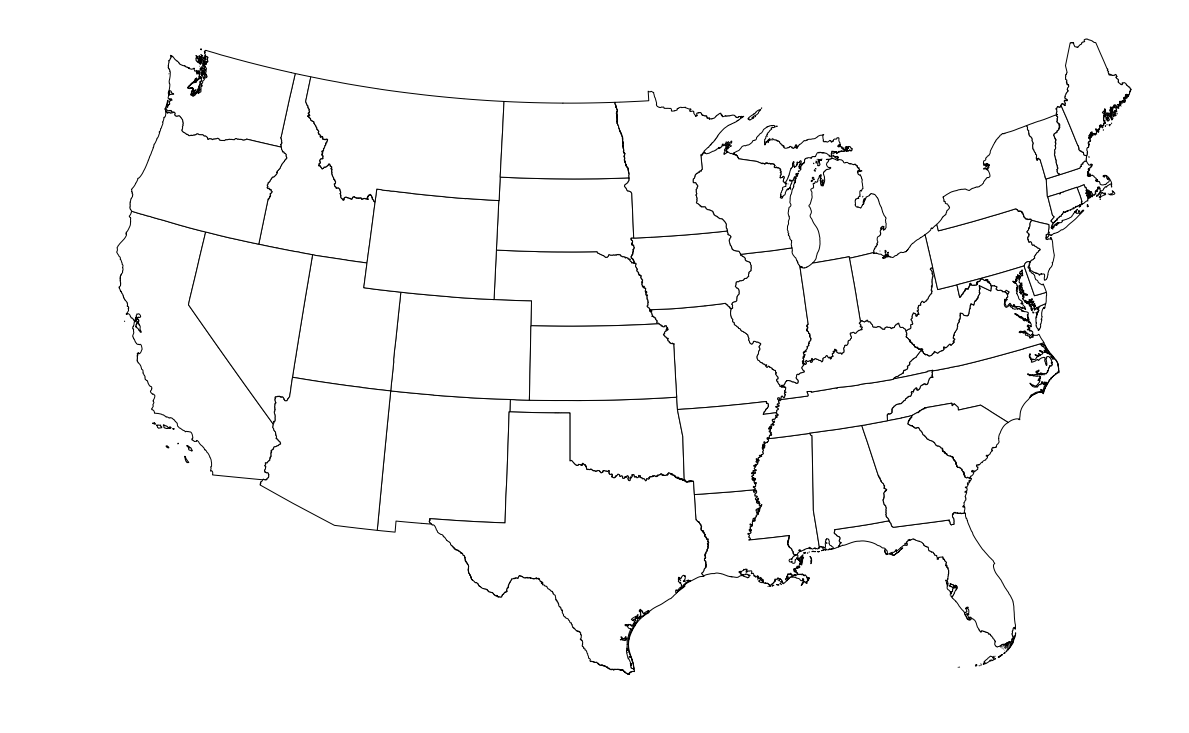

In [55]:
fig, ax = plt.subplots(figsize=(20,15))

delete_states = ['AK', 'HI', 'PR', 'GU']
states_shape_cases  = states_shape_cases.loc[~states_shape_cases['STUSPS'].isin(delete_states)]
states_shape_cases = states_shape_cases.to_crs(epsg=2163)

states_shape_cases.plot(ax=ax, color='w', edgecolor='black')

# Insert comment here
plt.axis('off')

In [56]:
states_shape_cases['point'] = states_shape_cases['geometry'].centroid
state_points = states_shape_cases[['point', 'NAME', 'cases']]
state_points = state_points.set_geometry('point')
state_points['coords'] = state_points['point'].apply(lambda x: x.representative_point().coords[:])
state_points['coords'] = [state_points[0] for state_points in state_points['coords']]

In [57]:
state_points.head()

,point,NAME,cases,coords
0,POINT (968900.5142401541 -1302349.006773153),Mississippi,579,"(968900.5142401541, -1302349.0067731533)"
1,POINT (1849270.427707764 -820703.8884651705),North Carolina,783,"(1849270.4277077643, -820703.8884651705)"
2,POINT (227351.7828779383 -1041651.468761091),Oklahoma,322,"(227351.7828779383, -1041651.4687610908)"
3,POINT (1846721.444074068 -594717.0352157739),Virginia,606,"(1846721.4440740685, -594717.0352157739)"
4,POINT (1666480.709214782 -511066.3749840383),West Virginia,96,"(1666480.709214782, -511066.3749840383)"


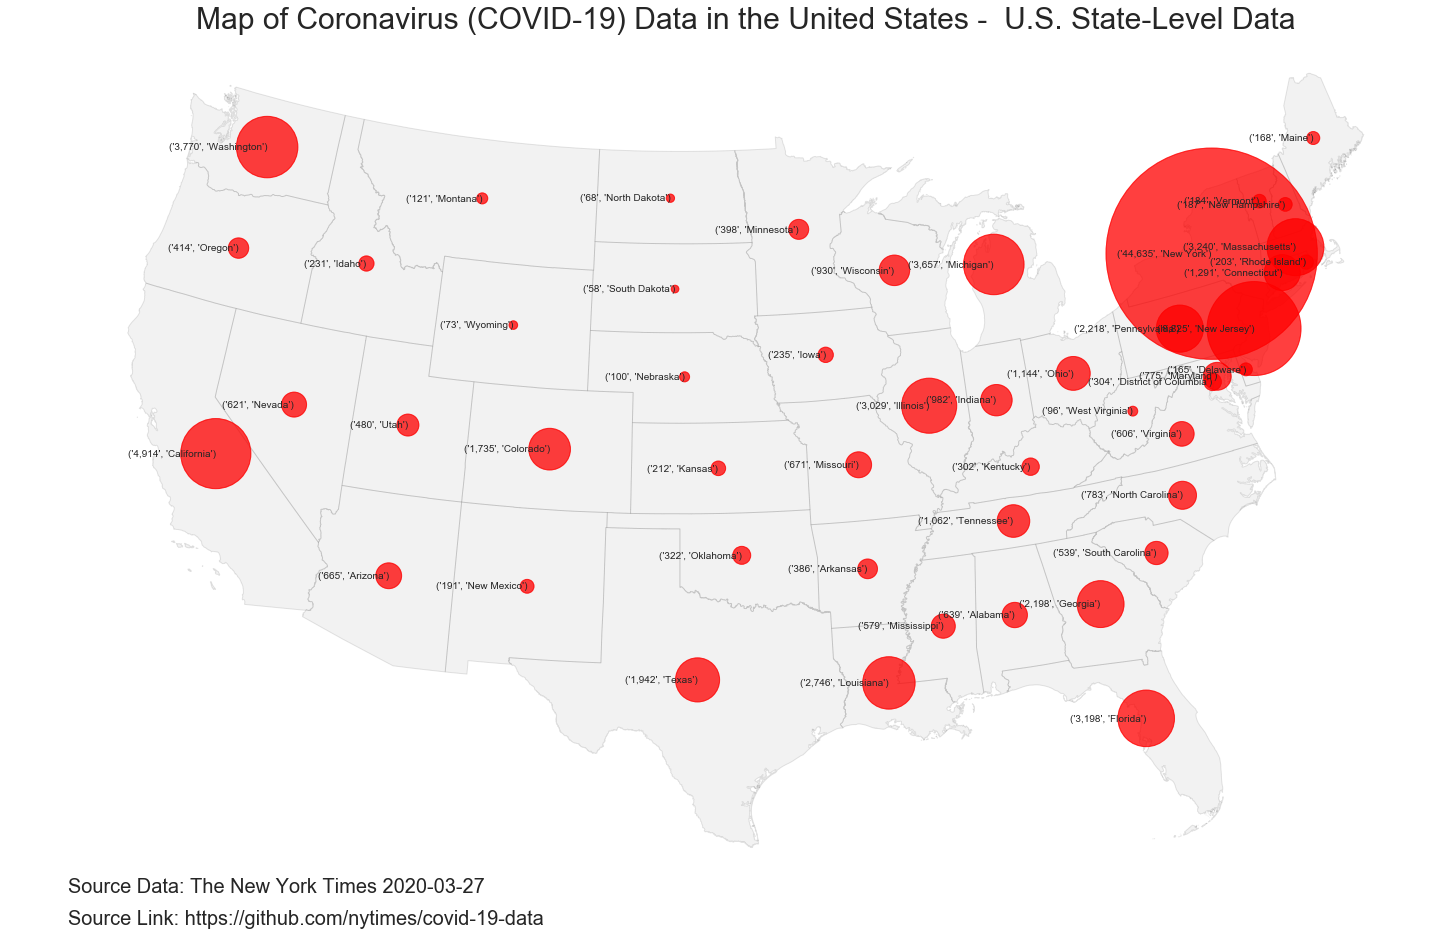

In [58]:
fig, ax = plt.subplots(figsize=(20,15))

states_shape_cases.plot(ax=ax, color='gray', edgecolor='black', alpha=.1)
state_points.plot(ax=ax, color='red', markersize=state_points['cases'], alpha=.5)

state_points.plot(ax=ax, color='red', markersize=state_points['cases'], alpha=.5)
for idx, row in state_points.iterrows():
    plt.annotate(s=('{:,}'.format(row['cases']), row['NAME']), xy=row['coords'],
                 horizontalalignment='right', va='center')
    
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')
plt.figtext(0.05, 0.1, txt, wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.05, 0.07, txt2, wrap=True, horizontalalignment='left', fontsize=20)

ax.set_title('Map of Coronavirus (COVID-19) Data in the United States -  U.S. State-Level Data', fontsize=30)
plt.axis('off')
plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-state-map-032720')

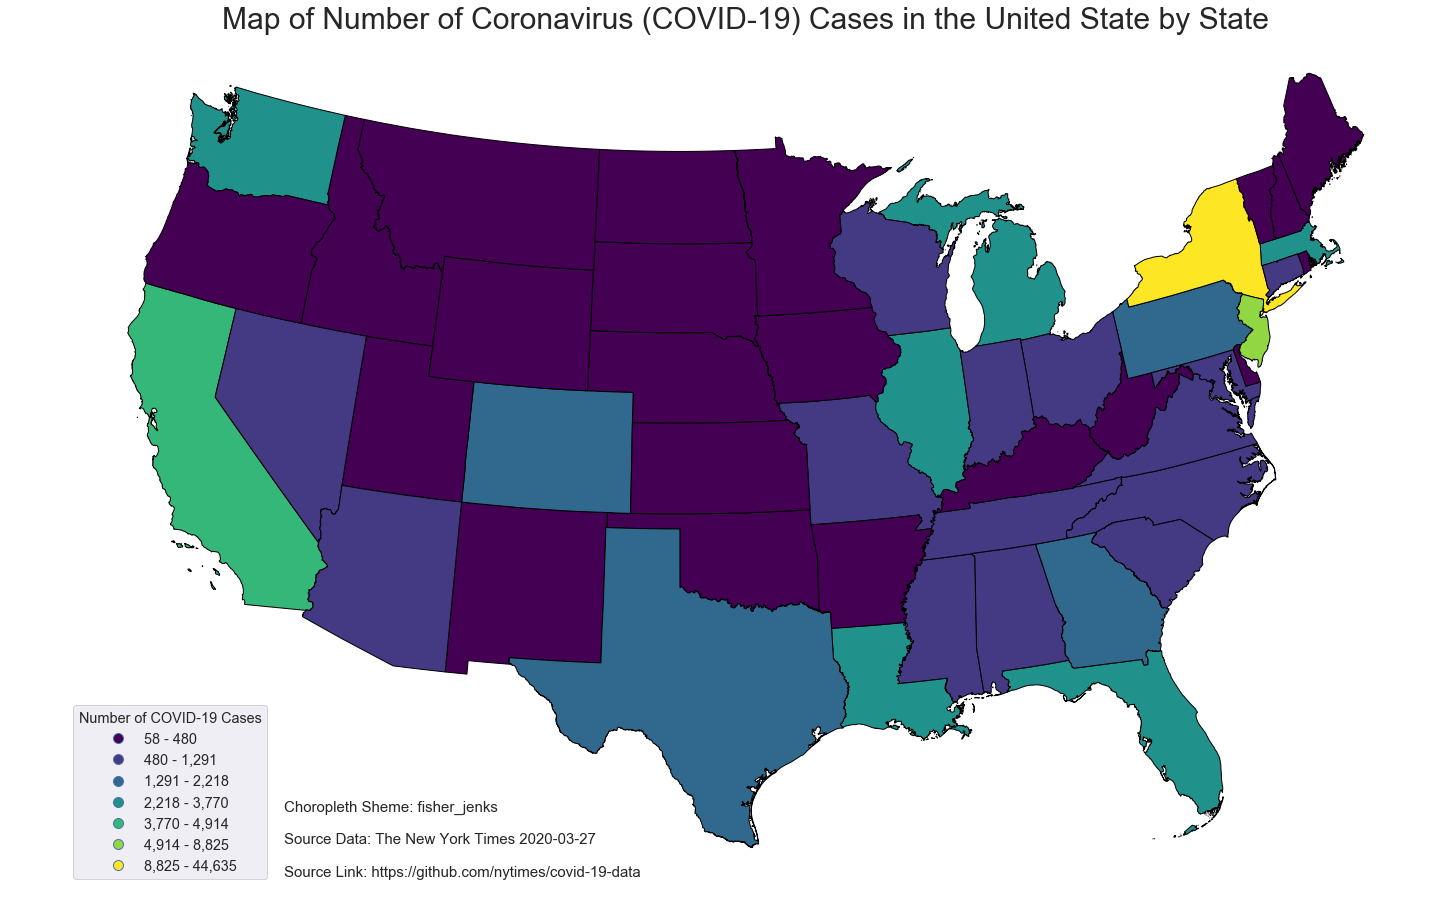

In [63]:
# defining our plot
plt.subplots(figsize=(20,15))
ax = plt.subplot()

fig = states_shape_cases.plot(column=("cases"), ax=ax, k=7, 
                   scheme='fisher_jenks', label=True, legend=True, 
                   legend_kwds={'loc': 'lower left', 'title': 'Number of COVID-19 Cases', 
                   'title_fontsize': 'x-large','fontsize': 'x-large'}, 
                   cmap='viridis', edgecolor='black')

ax.set_title("Map of Number of Coronavirus (COVID-19) Cases in the United State by State", fontsize=30)
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')
txt3 = ('Choropleth Sheme: fisher_jenks')
plt.figtext(0.2, 0.145, txt, wrap=True, horizontalalignment='left', fontsize=15)
plt.figtext(0.2, 0.115, txt2, wrap=True, horizontalalignment='left', fontsize=15)
plt.figtext(0.2, 0.175, txt3, wrap=True, horizontalalignment='left', fontsize=15)

leg = fig.get_legend()
leg._loc = 3

for lbl in leg.get_texts():
    label_text = lbl.get_text()
    lower = label_text.split()[0]
    upper = label_text.split()[2]
    new_text = f'{float(lower):,.0f} - {float(upper):,.0f}'
    lbl.set_text(new_text)

plt.axis('off')
plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-state-map-choro-032720')